In [2]:
import warnings

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

from get_data import get_balanced_exoplanet_data

warnings.simplefilter("ignore")

In [3]:
x_train, x_test, y_train, y_test = get_balanced_exoplanet_data()


In [4]:
## Plot accuracy as function of lambda l2 regularization

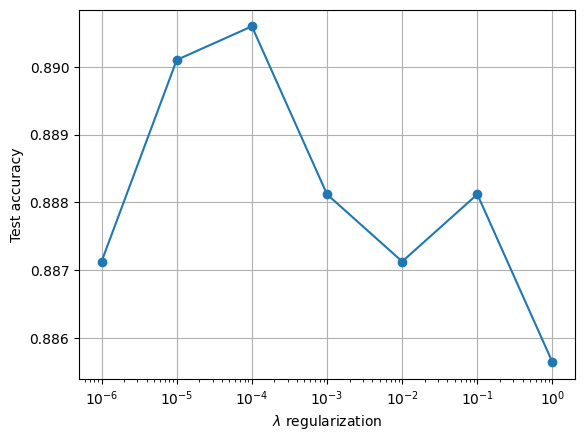

In [6]:
rng_seed = 2023
lmbdas = np.logspace(-6, 0, 7)
n_epochs = 1000
filename = "../results/figures/logreg_accuracy_plot.png"

accuracies = list()

for i, lmbda in enumerate(lmbdas):
    model = LogisticRegression(
        C=1 / lmbda,
        penalty="l2",
        max_iter=n_epochs,
        tol=1e-4,
        solver="lbfgs",
        random_state=rng_seed,
    )
    model.fit(x_train, y_train.ravel())
    pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, pred))

plt.plot(lmbdas, accuracies, "-o")
plt.xlabel("$\lambda$ regularization")
plt.ylabel("Test accuracy")
plt.xticks(lmbdas)
plt.xscale("log")
plt.grid(True)
if filename:
    plt.savefig(filename)
plt.show()